# Data Science TASK-3

 ***Author :- KSHITIZ VERMA***

***Handwritten Digit Classification Challenge (ADVANCED LEVEL TASK)***

### Importing important libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Loading Data Set

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
len(X_train),len(X_test)

(60000, 10000)

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened.shape ,X_test_flattened.shape

((60000, 784), (10000, 784))

In [5]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 952us/step - loss: 0.4808 - accuracy: 0.8800
Epoch 2/5
1875/1875 [==============================] - 2s 884us/step - loss: 0.3054 - accuracy: 0.9162
Epoch 3/5
1875/1875 [==============================] - 2s 904us/step - loss: 0.2849 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 2s 845us/step - loss: 0.2747 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 848us/step - loss: 0.2672 - accuracy: 0.9255


#### Accuracy without Hidden layer

In [6]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 612us/step - loss: 0.2751 - accuracy: 0.9221


[0.27514195442199707, 0.9221000075340271]

In [7]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.5429485e-05, 9.5794928e-11, 6.0012037e-05, 1.1615217e-02,
       9.2358027e-07, 6.2304054e-05, 7.9902418e-10, 8.1796569e-01,
       5.5308567e-05, 7.3584914e-04], dtype=float32)

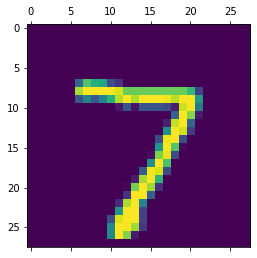

In [8]:
plt.matshow(X_test[0])

In [9]:
np.argmax(y_predicted[0])

7

In [10]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [11]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [12]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    2,    4,    2,   13,    0],
       [   5,    7,  908,   41,    9,    4,   10,   10,   34,    4],
       [   1,    0,   10,  958,    0,   10,    2,   10,   10,    9],
       [   1,    1,    4,    1,  906,    0,   10,    4,    9,   46],
       [   9,    1,    3,   58,   11,  758,   14,    8,   23,    7],
       [  10,    3,    6,    2,    8,   13,  912,    2,    2,    0],
       [   1,    5,   19,   13,    6,    0,    0,  952,    1,   31],
       [   7,    5,    6,   55,    9,   28,    8,   13,  832,   11],
       [  11,    5,    1,   15,   20,    5,    0,   24,    3,  925]])>

Text(69.0, 0.5, 'Truth')

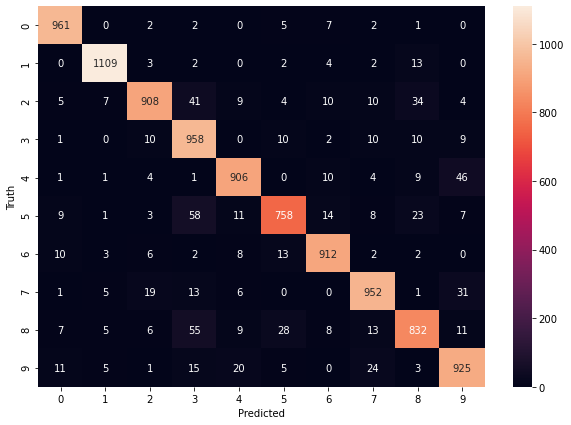

In [13]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Adding hidden layer 

In [14]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu') #Hidden Layer
    ,keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2909 - accuracy: 0.9184
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1383 - accuracy: 0.9601
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0993 - accuracy: 0.9703
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0788 - accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0631 - accuracy: 0.9804


#### Accuracy after adding hidden layer

In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 0.9727


[0.09311062842607498, 0.9726999998092651]

Text(69.0, 0.5, 'Truth')

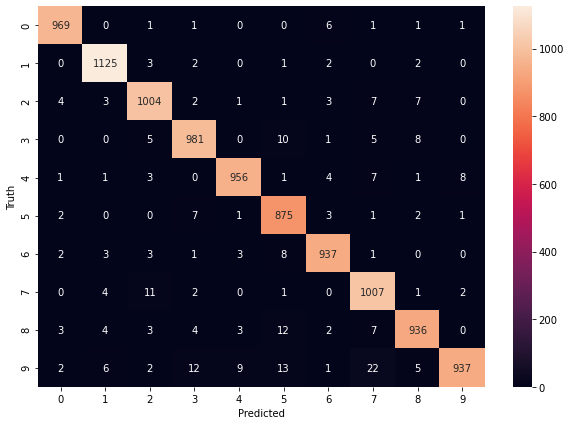

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

2

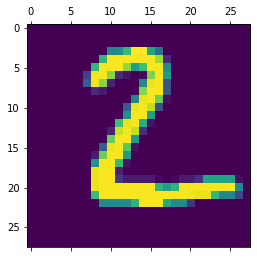

In [17]:
plt.matshow(X_test[1])
np.argmax(y_predicted[1])